# Исследование рынка заведений общественного питания Москвы

Необходимо подготовить исследование рынка Москвы, найти интересные особенности и презентовать полученные результаты, которые в будущем помогут в выборе подходящего инвесторам места.
Набор данных содержит информацию о заведениях общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Информация, размещённая в сервисе Яндекс Бизнес, могла быть добавлена пользователями или найдена в общедоступных источниках. Она носит исключительно справочный характер.

<b>Шаг 1: Загрузка и первичный анализ данных</b>

- Импортирую необходимые библиотеки: pandas, seborn, matplotlib, missingno.
- Установлю необходимые параметры и настройки отображения данных.
- Загружу датасет из файла в DataFrame с использованием pandas.
- Первоначально изучу данные с использованием методов head(), info() для получения предварительного представления о данных.

<b>Шаг 2: Предобработка данных</b>

- Изучу типы данных в каждом столбце и при необходимости приведу значения к нужному типу.
- Выполню поиск пропусков с помощью isnull().sum() для определения количества пропусков в каждом столбце,определю порядок и способы заполнения пропущенных значений, если это возможно.
- Преобразую типы данных с помощью метода dtypes в столбцах, которые нуждаются в изменении типов данных.
- Изучу столбцы с категориальными данными на наличие лишних пробелов и неявных дубликатов.
- Исправляю неявные дубликаты, используя методы replace(), чтобы унифицировать названия заведений.

<b>Шаг 3: Добавление новых столбцов</b>

- Создам новый столбец с названиями улиц из столбца с адресом.
- Добавлю новый столбец, с обозначением работает ли заведение круглосуточно или нет.

<b>Шаг 4: Исследовательский анализ данных</b>

- Проанализирую категории заведений и количество объектов в каждой категории, количество мест в заведениях по категориям, соотношение сетевых и несетевых заведений, топ наиболее популярных заведений, распределение заведений по административным районам Москвы, рейтинги заведений в разбивке по категориям и расположению заведений, средний чек в зависимости от располоения заведения.
- Изучу количество кофеен в данных, их распрееление по районам Москвы, график работы, рейтинги и средний чек.

<b>Шаг 5: Исследовательский анализ данных о кофейнях</b>

- Проанализирую категории заведений и количество объектов в каждой категории, количество мест в заведениях по категориям, соотношение сетевых и несетевых заведений, топ наиболее популярных заведений, распределение заведений по административным районам Москвы, рейтинги заведений в разбивке по категориям и расположению заведений, средний чек в зависимости от располоения заведения.
- Изучу количество кофеен в данных, их распрееление по районам Москвы, график работы, рейтинги и средний чек.


<b>Шаг 6: Общий вывод</b>

- Пропишу все ключевые выводы из проведённого анализа. 
- Сформулирую общий вывод исследования, указывая на важные наблюдения, выявленные в процессе работы с данными.
- Опишу рекомендации для инвесторов.
- Сформирую презентацию с основными выводами и графиками.


<b> Презентация результатов исследования:</b> https://disk.yandex.ru/i/pbxm3jAbxIhprg

## Загрузка и первичный анализ данных

### Импорт библиотек и установка параметров отображения данных

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
# импорт matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
# импорт seborn
import seaborn as sns
# импорт plotly.express
import plotly.express as px 
# импорт библиотеки pandas
import pandas as pd
# импорт библиотеки missingno
import missingno as msno


# установка формата отображения вещественных чисел в Pandas
pd.set_option('display.float_format', '{:,.2f}'.format)

# сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)

# сброс ограничений на число строк
pd.set_option('display.max_rows', None)

# сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

pd.set_option('display.max_seq_items', None)

# установка формата отображения чисел с двумя знаками после запятой
pd.set_option('display.float_format', '{:.2f}'.format)

### Получение общей информации о данных

In [3]:
# чтение файла с данными и сохранение в data
data = pd.read_csv('/datasets/moscow_places.csv')
# получение первых 10 строк таблицы data
data.head(10)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.88,37.48,5.00,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.88,37.48,4.50,выше среднего,Средний счёт:1500–1600 ₽,1550.00,NaN,0,4.00
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00–02:00",55.89,37.53,4.60,средние,Средний счёт:от 1000 ₽,1000.00,NaN,0,45.00
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.88,37.49,5.00,NaN,Цена чашки капучино:155–185 ₽,NaN,170.00,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.88,37.45,5.00,средние,Средний счёт:400–600 ₽,500.00,NaN,1,148.00
5,Sergio Pizza,пиццерия,"Москва, Ижорская улица, вл8Б",Северный административный округ,"ежедневно, 10:00–23:00",55.89,37.51,4.60,средние,NaN,NaN,NaN,0,NaN
6,Огни города,"бар,паб","Москва, Клязьминская улица, 9, стр. 3",Северный административный округ,пн 15:00–04:00; вт-вс 15:00–05:00,55.89,37.52,4.40,средние,Средний счёт:199 ₽,199.00,NaN,0,45.00
7,Mr. Уголёк,быстрое питание,"Москва, Клязьминская улица, 9, стр. 3",Северный административный округ,"пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00–22:00",55.89,37.52,4.70,средние,Средний счёт:200–300 ₽,250.00,NaN,0,45.00
8,Donna Maria,ресторан,"Москва, Дмитровское шоссе, 107, корп. 4",Северный административный округ,"ежедневно, 10:00–22:00",55.88,37.54,4.80,средние,Средний счёт:от 500 ₽,500.00,NaN,0,79.00
9,Готика,кафе,"Москва, Ангарская улица, 39",Северный административный округ,"ежедневно, 12:00–00:00",55.88,37.52,4.30,средние,Средний счёт:1000–1200 ₽,1100.00,NaN,0,65.00


In [4]:
# получение общей информации о данных в таблице data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


В данных присутствуют значительные пропуски в столбцах, связанных с ценовой информацией и количеством мест. Это может повлиять на точность анализа, так как эти признаки важны для исследования. Чтобы понять можно ли заполнить пропуски, посмотрим на них подробнее.

## Предобработка данных

### Обработка пропущенных значений

In [5]:
# подсчёт пропусков
data.isna().sum()

name                    0
category                0
address                 0
district                0
hours                 536
lat                     0
lng                     0
rating                  0
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
chain                   0
seats                3611
dtype: int64

In [6]:
# подсчет процента пропусков для каждого столбца с сортировкой
missing_percent = data.isnull().mean() * 100
missing_percent_sorted = missing_percent[missing_percent > 0].sort_values(ascending=False)

missing_percent_sorted

middle_coffee_cup   93.64
middle_avg_bill     62.54
price               60.56
avg_bill            54.60
seats               42.96
hours                6.38
dtype: float64

Столбцы price, avg_bill, middle_avg_bill, middle_coffee_cup и seats содержат значительное количество пропусков. Это указывает на неполные данные о ценах, среднем счете, средней цене чашки кофе и количестве посадочных мест.
Посмотрим есть ли взаимосвязь между пропущенными значениями.

<AxesSubplot:>

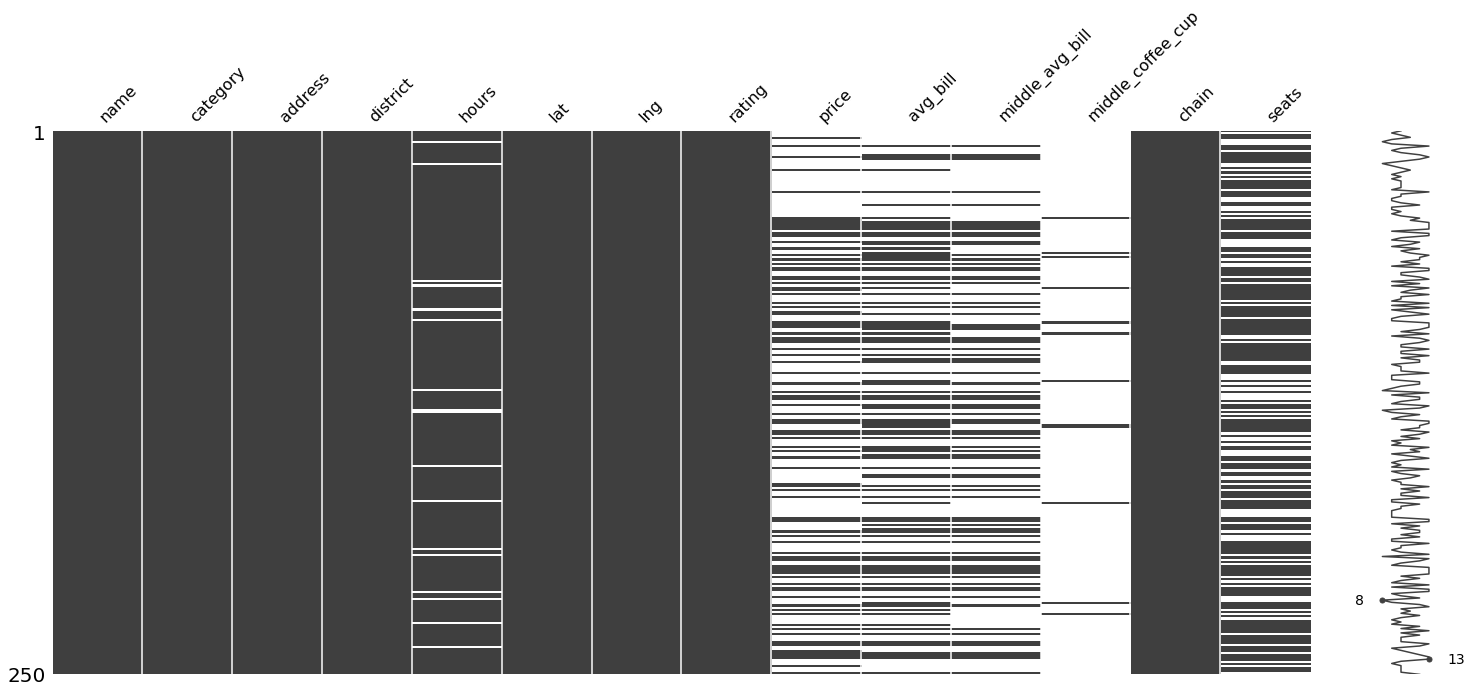

In [7]:
%matplotlib inline
msno.matrix(data.sample(250))

<AxesSubplot:>

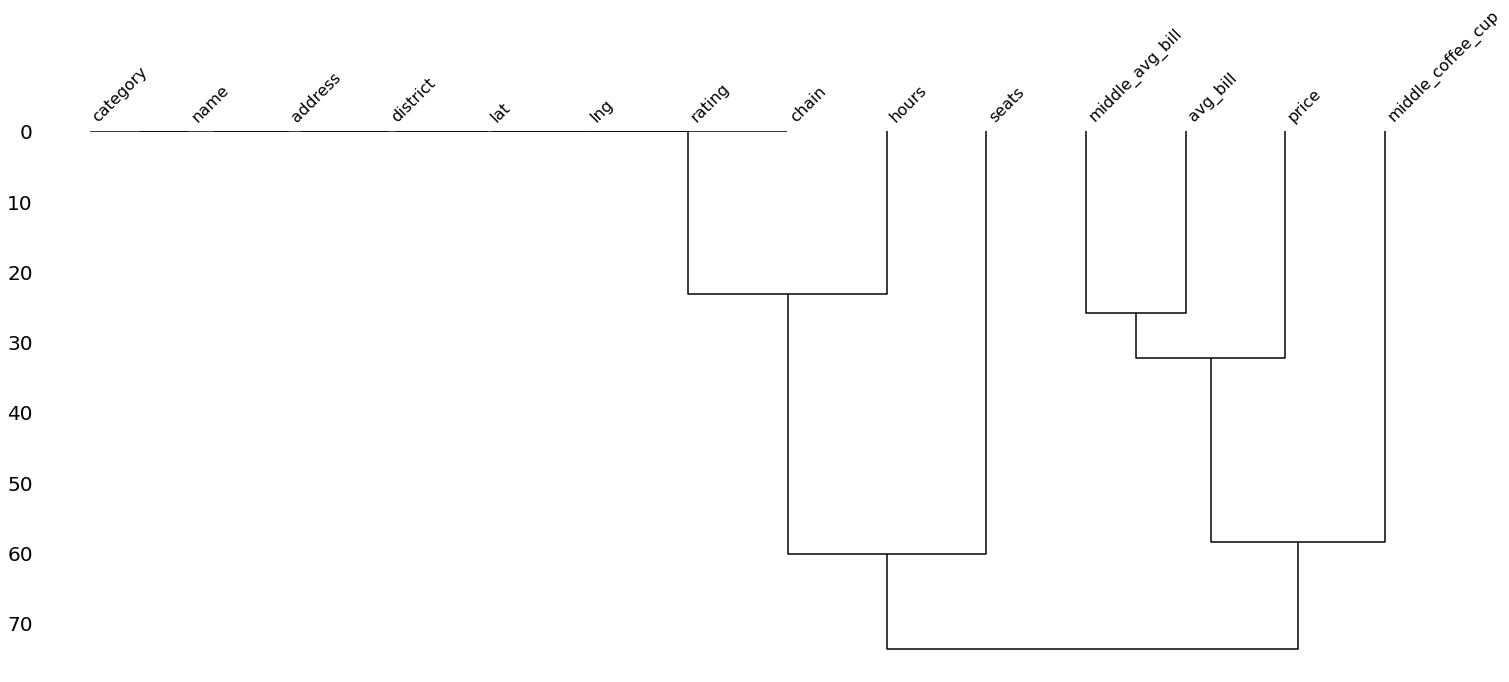

In [8]:
msno.dendrogram(data)

Судя по графикам пропуски в столбцах price, avg_bill и middle_avg_bill / middle_coffee_cup взаимосвязаны. Если значение пропущено в столбце avg_bill, то и в столбцах middle_avg_bill, middle_coffee_cup занчение отсутствует.
Заполнить пропуски в этих данных логическим путем невозможно, так же как и удалить строки с пропусками, т.к. пропуски присутствуют в большей части строк. Проведем анализ исходя из представленных данных с учетом пропусков.

### Изменение типов данных

Проверим типы данных в датафрейме и преобразуем их там, где это необходимо.

In [9]:
# вывод общей информации
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


В столбцах lat, lng, rating, middle_avg_bill, middle_coffee_cup, seats изменим тип данных с float64 на float32 для оптимизации объемов занимаемой памяти.

In [10]:
# изменение типов данных для выбранных столбцов
column_to_type = ['lat', 'lng', 'rating', 'middle_coffee_cup', 'seats']
for column in column_to_type:
    data[column] = data[column].astype('float')

### Обработка дубликатов

Для начала проверим наличие лишних пробелов в столбцах с категориальными данными.

In [11]:
# столбцы для проверки лишних пробелов
columns_to_check = ['name', 'address', 'category', 'hours', 
                    'price', 'avg_bill', 'district']

# функция для проверки пробелов в начале или в конце строк
def check_extra_spaces(data, columns):
    results = {}
    for column in columns:
        has_extra_spaces = data[column].apply(lambda x: isinstance(x, str) and (x.strip() != x))
        if has_extra_spaces.any():
            results[column] = data[has_extra_spaces][column].unique()
    return results

extra_spaces = check_extra_spaces(data, columns_to_check)

if extra_spaces:
    print("Найдены лишние пробелы в следующих столбцах:")
    for column, values in extra_spaces.items():
        print(f"{column}")
else:
    print("Лишних пробелов не найдено.")


Лишних пробелов не найдено.


Проверим уникальные значения в столбце category чтобы проверить наличие неявных дубликатов.

In [12]:
# вывод остортированных уникальных значений category
data['category'].sort_values().unique()

array(['бар,паб', 'булочная', 'быстрое питание', 'кафе', 'кофейня',
       'пиццерия', 'ресторан', 'столовая'], dtype=object)

Теперь проверим неявные дубликаты в столбце name. Для начала приведем все значения к нижнему регистру и выведем все уникальные значения.

In [13]:
# приведение к нижнему регистру
data['name'] = data['name'].str.lower()

# вывод остортированных уникальных значений name
unique_names = data['name'].sort_values().unique().tolist()

unique_names[:30]

['#кешбэккафе',
 '+39 pizzeria mozzarella bar',
 '1 этаж',
 '1-я креветочная',
 '10 идеальных пицц',
 '1001 ночь',
 '100ловая',
 '100лоффка',
 '13',
 '13 chef doner',
 '15 kitchen+bar',
 '15-й шар',
 '16 июня',
 '16 тонн',
 '18 грамм',
 '1901 comfort food zone',
 '1у',
 '2 типа',
 '2-й этаж',
 '2046',
 '21 век',
 '22 акра кофе&хлеб',
 '2u-ту-ю',
 '3 ступени',
 '351 bar',
 '4 сезона',
 '4.2. bar',
 '4/1 restaurant',
 '42 coffee shop',
 '47']

В названиях заведений есть различные варианты написания названий, например & с пробелами и без, что может привести к появлению неявных дубликатов. Заменим все написания на вариант без пробелов.

In [14]:
# устранение неявных дубликатов в столбце name
data['name'] = (
    data['name']
    .str.replace('"', "'")
    .replace([' & '], '&', regex=True)
    .replace([' - '], '-', regex=True)
) 

Так как данные представлены из двух источников необходимо проверить есть ли строки-дубликаты по совпадению значений двух столбцов - name и address.
Для этого необходимо привести занчения столбца address к нижнему регистру.

In [15]:
# приведение к нижнему регистру
data['address'] = data['address'].str.lower()

In [16]:
# проверка на наличие неявных дубликатов
print('Дубликаты строк с совпадением значений колонок name и  address',data.duplicated(subset=['name','address']).sum())

Дубликаты строк с совпадением значений колонок name и  address 4


Найдено 4 дублирующиеся строки. Удалим их.

In [17]:
# проверка на наличие неявных дубликатов
data = data.drop_duplicates(subset=['name','address'])

In [18]:
# проверка на наличие неявных дубликатов
print('Дубликаты строк с совпадением значений колонок name и  address',data.duplicated(subset=['name','address']).sum())

Дубликаты строк с совпадением значений колонок name и  address 0


Проверим данные на наличие строк-дубликатов.

In [19]:
# проверка на наличие строк-дубликатов
data.duplicated().sum()

0

### Добавление новых столбцов

Добавим столбец с названием улицы, на которой расположены заведения. Для этого выделим улицу из столбца address.

In [20]:
# добавление столбца с названием улицы
data['street'] = data['address'].str.extract(r',\s*([^,]+)\s*,?')

Добавим столбец с обозначением, что заведение работает ежедневно и круглосуточно.

In [21]:
# условие для определения работы 24/7
data['is_24_7'] = data['hours'].str.contains('ежедневно, круглосуточно', case=False)

Проверим добавление новых столбцов.

In [22]:
# вывод первых 5 срок
data.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24_7
0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.88,37.48,5.00,NaN,NaN,NaN,NaN,0,NaN,улица дыбенко,False
1,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.88,37.48,4.50,выше среднего,Средний счёт:1500–1600 ₽,1550.00,NaN,0,4.00,улица дыбенко,False
2,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00–02:00",55.89,37.53,4.60,средние,Средний счёт:от 1000 ₽,1000.00,NaN,0,45.00,клязьминская улица,False
3,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.88,37.49,5.00,NaN,Цена чашки капучино:155–185 ₽,NaN,170.00,0,NaN,улица маршала федоренко,False
4,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",55.88,37.45,5.00,средние,Средний счёт:400–600 ₽,500.00,NaN,1,148.00,правобережная улица,False


В процессе предобработки данных были выявлены пропуски, в основном касающиеся данных о ценах, и неявные дубликаты. Были проверены лишние пробелы в строках, устранены неявные дубликаты в названиях заведений. Также в данные были добавлены новые столбцы для дальнейшего анализа.
Предобработка данных является важным шагом, так как она помогает устранить ошибки и неточности, которые могут исказить результаты исследования. Приведение данных к единому формату также упрощает дальнейшую работу и обработку данных.

## Исследовательский анализ данных

### Категории заведений

Посмотрим как рапределяются заведения по категориям. Для этого построим столбчатую диаграмму с количеством заведений в разбивке по категориям.

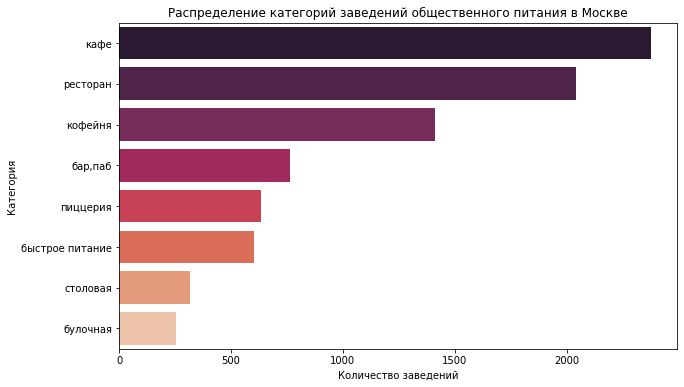

In [23]:
# подсчет количества заведений в каждой категории
category_counts = data['category'].value_counts()

# построение графика
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette='rocket')
plt.title('Распределение категорий заведений общественного питания в Москве')
plt.xlabel('Количество заведений')
plt.ylabel('Категория')
plt.show()

Наиболее популярными типами являются кафе, рестораны и кофейни. 
На графике видно, что кафе являются самой распространённой категорией заведений общественного питания в Москве. Это может свидетельствовать о том, что такие заведения относительно доступны по цене, удобны для быстрого питания и популярны среди жителей и гостей города.
Рестораны занимают второе место по числу заведений. Это говорит о значительном спросе на более полноценные и разнообразные обеды и ужины, места для проведения встреч, мероприятий, торжеств.
Кофейни также популярны в Москве, что может быть связано с высоким потреблением кофе горожанами, особенно среди молодых людей и офисных работников.
Бары и пабы представлены в значительном количестве, что может свидетельствовать о востребованности таких заведений для вечернего отдыха и встреч.
Пиццерии и фастфуд также занимают заметные позиции, что неудивительно, учитывая их популярность среди семей, студентов и людей с ограниченным временем.
Столовые и булочные занимают небольшую долю в распределении. Это может говорить о том, что такие заведения менее востребованы в Москве или что они представлены в ограниченных местах.

Эти данные помогут инвесторам в дальнейшем выборе формата заведения.

### Количество посадочных мест в заведениях в разбивке по категориям

Посмотрим как распределяется количество посадочных мест в заведениях в разбивке по категориям.

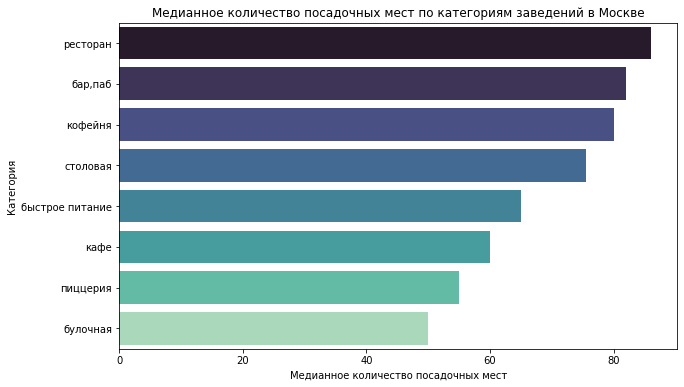

In [24]:
# группировка данных по категориям и вычисление медианы по числу посадочных мест
seats_by_category = data.groupby('category')['seats'].median().sort_values(ascending=False)

# построение графика
plt.figure(figsize=(10, 6))
sns.barplot(x=seats_by_category.values, y=seats_by_category.index, palette='mako')
plt.title('Медианное количество посадочных мест по категориям заведений в Москве')
plt.xlabel('Медианное количество посадочных мест')
plt.ylabel('Категория')

plt.show()

График демонстрирует распределение медианного количества посадочных мест по категориям заведений Москвы.  
Категории заведений с более долгим временем пребывания (рестораны, бары) имеют больше посадочных мест, тогда как заведения с быстрым обслуживанием (кафе, фастфуд) рассчитаны на меньшую вместимость. Стоит отметить что кафе по количеству посадочных мест находятся на 6-й позиции, в то время как по количеству заведений это самая популярная категория. Это может быть обусловлено в том числе тем, что посетители проводят в кафе немного времени или могут брать еду на вынос. Аналогичные причины небольшого количество посадочных мест применимы для заведений категорий быстрого питания, пиццерий и булочных.
Большое количество посадочных мест в кофейнях может быть обусловлено тем, что люди заходят туда как на короткое, так и на довольно долгое время. Молодые люди могут проводить в кофейнях рабочие встречи и звонки, просто работать сидя в заведении. Дополнительным фактором может быть и то, что многие кофейни сейчас расширяют ассортимент и предлагают не только кофе и десерты, но и ланч-меню, завтраки и алкогольные коктейли и напитки.

### Сетевые и несетевые заведения

Посмотрим на соотношение сетевых и несетевых заведений. 

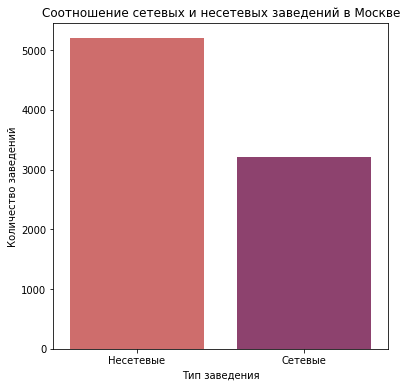

In [25]:
# подсчет количества сетевых и несетевых заведений
chain_counts = data['chain'].value_counts()

# построение графика
plt.figure(figsize=(6, 6))
sns.barplot(x=chain_counts.index, y=chain_counts.values, palette='flare')
plt.xticks([0, 1], ['Несетевые', 'Сетевые'])
plt.title('Соотношение сетевых и несетевых заведений в Москве')
plt.ylabel('Количество заведений')
plt.xlabel('Тип заведения')

plt.show()

Несетевых заведений в Москве больше, чем сетевых. Посмотрим на доли сетевых заведений в разрезе категорий.

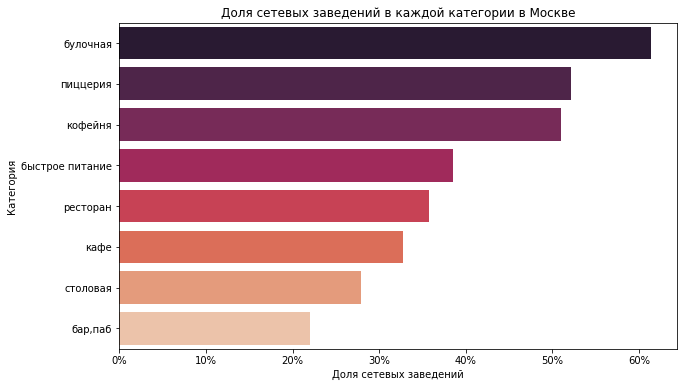

In [26]:
# вычисление доли сетевых заведений в каждой категории
category_chain_ratio = data.groupby('category')['chain'].mean().sort_values(ascending=False)

# построение графика
plt.figure(figsize=(10, 6))
sns.barplot(x=category_chain_ratio.values, y=category_chain_ratio.index, palette='rocket')

# Настройка заголовка и подписей
plt.title('Доля сетевых заведений в каждой категории в Москве')
plt.xlabel('Доля сетевых заведений')
plt.ylabel('Категория')

# Замена значений на горизонтальной оси на проценты
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))

# Отображение графика
plt.show()

Лидерами в сетевых заведениях являются булочные, пиццерии, кофейни. Это может быть обусловлено тем, что такие заведения проще стандартизировать, они требуют меньше финансовых вложений при открытии и ориентированы на широкую аудиторию.
Рестораны, кафе и бары чаще имеют уникальные характеристики, авторскую кухню, определенный ценовой сегмент. Это усложняет создание сетей.
Также они могут быть ориентированы на локальный спрос исходя из расположения заведения (в спальном или элитном районе, в деловом районе города с большим количеством бизнес-центров и т.п.).

### Топ-15 популярных сетей

Посмотрим какие сети представлены в наибольшем количестве заведений в Москве.

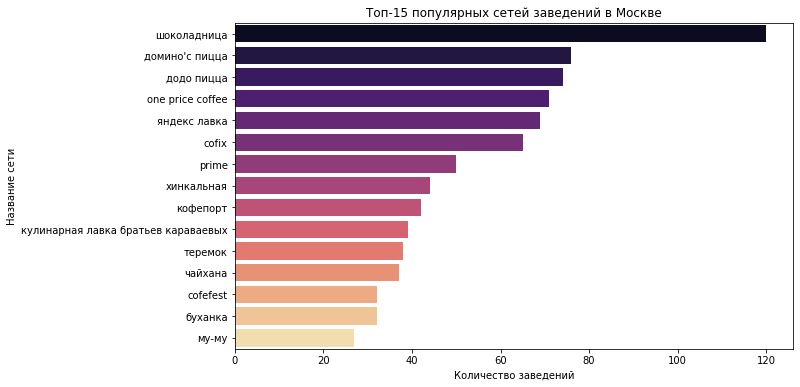

In [27]:
# Фильтрация только сетевых заведений
chain_data = data[data['chain'] == 1]

# Группировка по названиям заведений и подсчет количества заведений каждой сети
top_chains = chain_data['name'].value_counts().head(15)

# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(x=top_chains.values, y=top_chains.index, palette='magma')

# Настройка заголовка и подписей
plt.title('Топ-15 популярных сетей заведений в Москве')
plt.xlabel('Количество заведений')
plt.ylabel('Название сети')

# Отображение графика
plt.show()

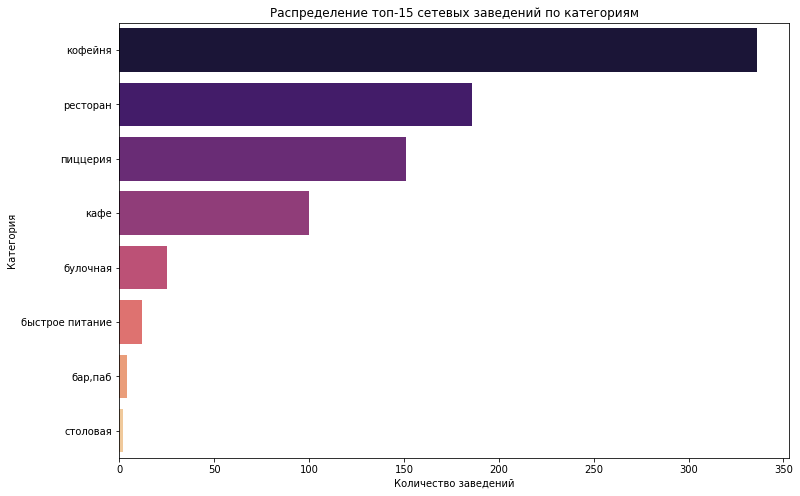

In [28]:
# группировка по названиям заведений и подсчет количества заведений каждой сети
top_chains = chain_data['name'].value_counts().head(15).index
top_chain_data = chain_data[chain_data['name'].isin(top_chains)]

# группировка по категориям и подсчет количества заведений
category_counts = top_chain_data['category'].value_counts().sort_values(ascending=False)

# построение графика
plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.values, y=category_counts.index, palette='magma')
plt.title('Распределение топ-15 сетевых заведений по категориям')
plt.xlabel('Количество заведений')
plt.ylabel('Категория')

plt.show()

Лидируют популярные сети кофеен и пиццерий, ориентированные на широкую аудиторию потребителей и формат "на вынос". Также в топе присутствуют сети разного формата - заведения быстрого питания, кулинарии, заведения локальной кухни (например "Хинкальня", "Чайхана").
Все топовые сети ориентированы на массовый сегмент — доступные кафе, кофейни, рестораны и пиццерии. Это подчёркивает, что формат быстрого и доступного питания особенно востребован в Москве.
В целом, график демонстрирует, что наиболее популярные сети в Москве — это заведения быстрого питания, которые легко масштабируются и предлагают доступные цены.

### Заведения в административных районах Москвы

Посмотрим как распределились заведения разных категорий по районам Москвы.

<Figure size 864x576 with 0 Axes>

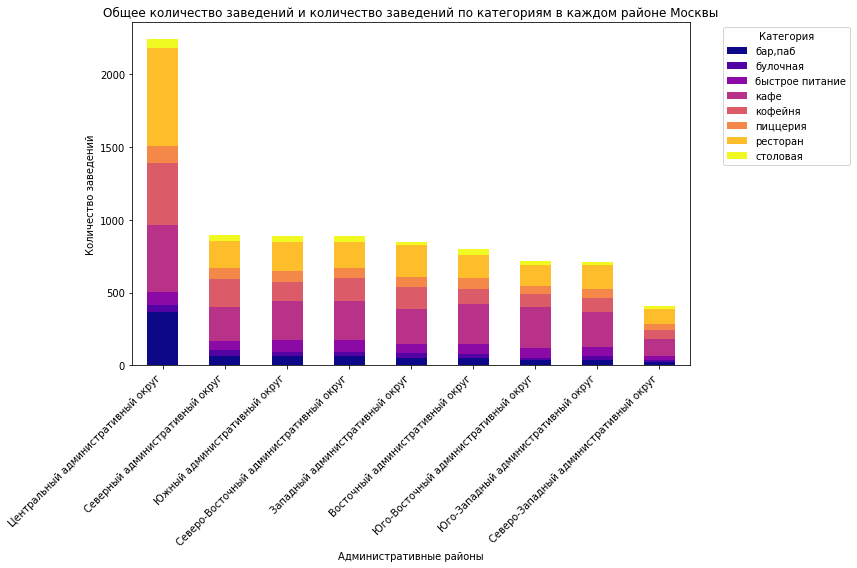

In [29]:
# группировка данных по районам и категориям
district_category_counts = data.groupby(['district', 'category']).size().reset_index(name='count')

# создание сводной таблицы
pivot_district_category = district_category_counts.pivot(index='district', columns='category', values='count').fillna(0)

# сортировка по общему количеству заведений
pivot_district_category = pivot_district_category.loc[
    pivot_district_category.sum(axis=1).sort_values(ascending=False).index
]

# построение графика
plt.figure(figsize=(12, 8))
pivot_district_category.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='plasma')

plt.title('Общее количество заведений и количество заведений по категориям в каждом районе Москвы')
plt.xlabel('Административные районы')
plt.ylabel('Количество заведений')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Категория', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

В Центральном административном районе находится наибольшее количество заведений общественного питания (более 2000), что неудивительно, т.к. именно здесь сосредоточена деловая и культурная жизнь города. 
В других районах примерно одинаковое количество заведений (около 700–800), что указывает на более сбалансированное распределение заведений в жилых районах.
Наименьшее количество заведений имеет Северо-Западный район (около 500).

Для всех районов, за исключением Центрального, наблюдается примерно одинаковая структура по категориям заведений. Наибольший вклад дают такие категории, как кафе, рестораны, кофейни и заведения быстрого питания. В Центральном, из-за его более широкого охвата, также более разнообразная структура заведений.

Таким образом, можно сделать вывод, что Центральный район Москвы является основным по количеству и разнообразию заведений, в то время как в других округах распределение более умеренное и сбалансированное.

### Рейтинги по категориям заведений

Посмотрим как распределяются рейтинги в зависимости от категорий заведений.

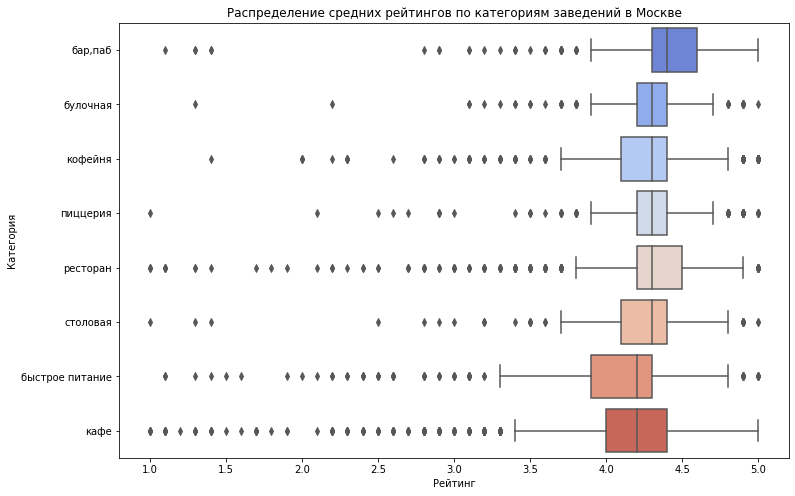

In [30]:
# вычисление медиан рейтингов по категориям и сортировка по убыванию
sorted_categories = data.groupby('category')['rating'].median().sort_values(ascending=False).index

# построение boxplot с сортировкой по медиане
plt.figure(figsize=(12, 8))
sns.boxplot(x='rating', y='category', data=data, order=sorted_categories, palette='coolwarm')
plt.title('Распределение средних рейтингов по категориям заведений в Москве')
plt.xlabel('Рейтинг')
plt.ylabel('Категория')

plt.show()


Кафе, рестораны и бары имеют довольно большой разброс оценок. Основное количество оценок находится в диапазоне от приблизительно 3.4 до 5, с медианными значениями около 4.2-4.4 Это говорит о стабильной оценке и высоком качестве этих заведений.

Кофейни также имеют относительно высокие медианные оценки, около 4.3.

Булочные, столовые, кофейни и пиццерии имеют практически идентичные медианные оценки, около 4,3, и небольшой разброс значений. Это говорит о высоком уровне удовлетворенности посетителей.

Наименьшая медианная оценка у заведений категории быстрого питания. При этом разброс оценок здесь шире, что указывает на то, что не все заведения этой категории получают высокие оценки.

Практически во всех категориях наблюдаются "выбросы" — значения, которые значительно отличаются от основного распределения. Это могут быть как исключительно положительные, так и крайне отрицательные отзывы о заведениях. Это может говорить о большом разнообразии в уровне сервиса или продукта.

### Рейтинги заведений по районам Москвы

Посмотрим как распределяются медианные рейтинги заведений в разных районах Москвы.

In [31]:
rating_df = data.groupby('district', as_index=False)['rating'].agg('mean').sort_values(by=['rating'], ascending=False)
rating_df

,district,rating
5,Центральный административный округ,4.38
2,Северный административный округ,4.24
4,Северо-Западный административный округ,4.21
8,Южный административный округ,4.18
1,Западный административный округ,4.18
0,Восточный административный округ,4.17
7,Юго-Западный административный округ,4.17
3,Северо-Восточный административный округ,4.15
6,Юго-Восточный административный округ,4.10


Для наглядности построим тепловую карты с рейтингами заведений.

In [32]:
# подключаем модуль для работы с JSON-форматом
import json

# читаем файл и сохраняем в переменной
with open('/datasets/admin_level_geomap.geojson', 'r') as f:
    geo_json = json.load(f)

In [33]:
# импортируем карту
import folium
from folium.plugins.heat_map import HeatMap

# загружаем JSON-файл с границами округов Москвы
state_geo = '/datasets/admin_level_geomap.geojson'

In [34]:
# построение тепловой карты по рейтингу
m = folium.Map([55.751244, 37.618423], zoom_start=10)
heatmap_data = data[['lat','lng', 'rating']].copy().dropna()
heatmap = heatmap_data[['lat','lng', 'rating']] 
HeatMap(data=heatmap, radius=14).add_to(m)
m 

Наивысший медианный рейтинг у заведений в Центральном, Северном и Северно-Западном административных районах Москвы.

### Топ-15 улиц по количеству заведений

Посмотрим топ-15 улиц по количеству заведений с визуализацией количества заведений по их категориям. 

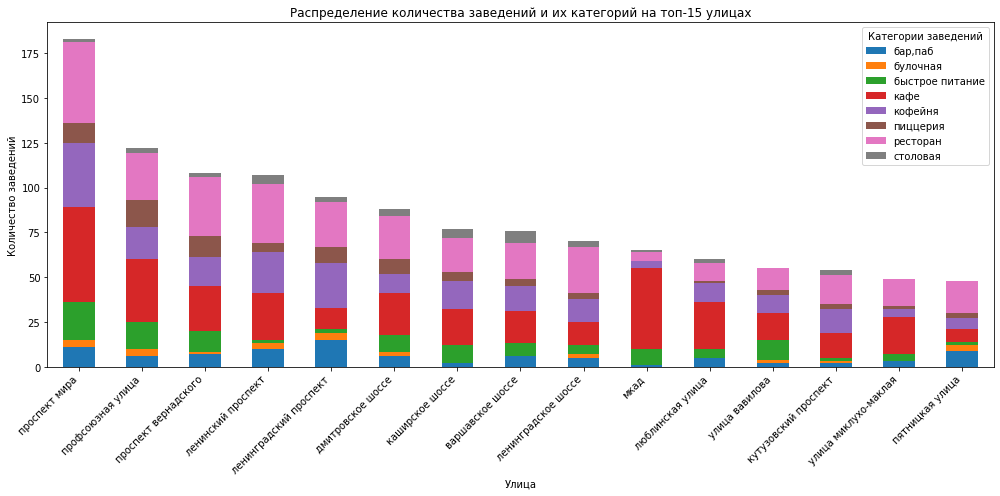

In [35]:
# находим топ-15 улиц по количеству заведений
top_streets = data['street'].value_counts().nlargest(15).index

# фильтруем данные по этим улицам
top_streets_data = data[data['street'].isin(top_streets)]

# группировка по улицам и категориям
street_category_count = top_streets_data.groupby(['street', 'category']).size().unstack().fillna(0)

# сортировка улиц по общему количеству заведений
street_category_count = street_category_count.loc[street_category_count.sum(axis=1).sort_values(ascending=False).index]

# построение графика
street_category_count.plot(kind='bar', stacked=True, figsize=(14,7))
plt.title('Распределение количества заведений и их категорий на топ-15 улицах')
plt.xlabel('Улица')
plt.ylabel('Количество заведений')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Категории заведений')
plt.tight_layout()
plt.show()


На каждой улице представлены заведения различных категорий. При этом кафе, кофейни и рестораны (фиолетовые, розовые и красные сегменты) занимают большую долю на большинстве улиц, что указывает на популярность этих типов заведений.

Проспект Мира явно выделяется по количеству заведений, их более 175. Это показывает высокую концентрацию заведений на этой улице и может свидетельствовать о высокой популярности данной улицы среди горожан и туристов. 

Такие улицы как Ленинский проспект, Профсоюзная улица, Ленинградский проспект и проспект Вернадского также имеют большое количество заведений (около 100). Это также может указывать на высокую проходимость этих улиц.

Такие улицы, как Вавилова, Пятницкая и Миклухо-Маклая, имеют наименьшее количество заведений. Это может быть связано с меньшей проходимостью или тем, что эти улицы расположены вдали от центральных районов Москвы.


### Улицы с одним заведением

Выделим данные о заведениях, которые являются единственными на своей улице.

In [36]:
# группировка данных по улице и подсчёт количества заведений на каждой улице
street_counts = data.groupby('street').size().reset_index(name='count')

# фильтрация улиц, на которых только одно заведение
single_establishment_streets = street_counts[street_counts['count'] == 1]['street']

# сохранение информации о заведениях, находящихся на этих улицах в отдельную переменную
single_establishment_info = data[data['street'].isin(single_establishment_streets)]

# вывод информации о таких заведениях
single_establishment_info[['name', 'address', 'category', 'rating', 'middle_avg_bill', 'seats']].head(20)


,name,address,category,rating,middle_avg_bill,seats
15,дом обеда,"москва, улица бусиновская горка, 2",столовая,4.10,400.00,180.00
21,7/12,"москва, прибрежный проезд, 7",кафе,4.50,NaN,NaN
25,в парке вкуснее,"москва, парк левобережный",кофейня,4.30,NaN,NaN
58,coffeekaldi's,"москва, угличская улица, 13, стр. 8",кофейня,4.10,650.00,NaN
60,чебуречная история,"москва, ландшафтный заказник лианозовский",кофейня,4.90,NaN,NaN
64,testo мания,"москва, лианозовский парк культуры и отдыха",кофейня,4.10,NaN,NaN
71,cofefest,"москва, новгородская улица, 23а",кофейня,4.10,NaN,NaN
73,веранда,"москва, парк алтуфьево",ресторан,4.20,NaN,NaN
97,жигулевское,"москва, бибиревская улица, 7к2","бар,паб",4.50,NaN,NaN
103,тетри,"москва, лианозовский проезд, вл1",быстрое питание,4.00,200.00,NaN


По таблице сложно сделать какие-либо выводы об особенностях таких заведений. Посмотрим их рапределение по категориям и районам города.

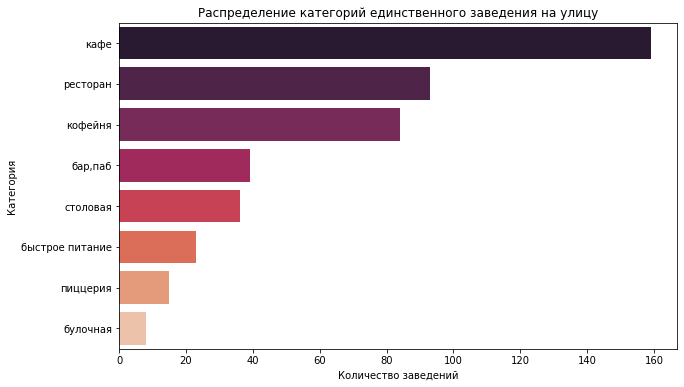

In [37]:
# подсчет количества заведений в каждой категории
category_counts = single_establishment_info['category'].value_counts()

# построение графика
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette='rocket')
plt.title('Распределение категорий единственного заведения на улицу')
plt.xlabel('Количество заведений')
plt.ylabel('Категория')
plt.show()

Чаще всего единственным заведением на улице являются кафе, рестораны и кофейни.

<Figure size 864x576 with 0 Axes>

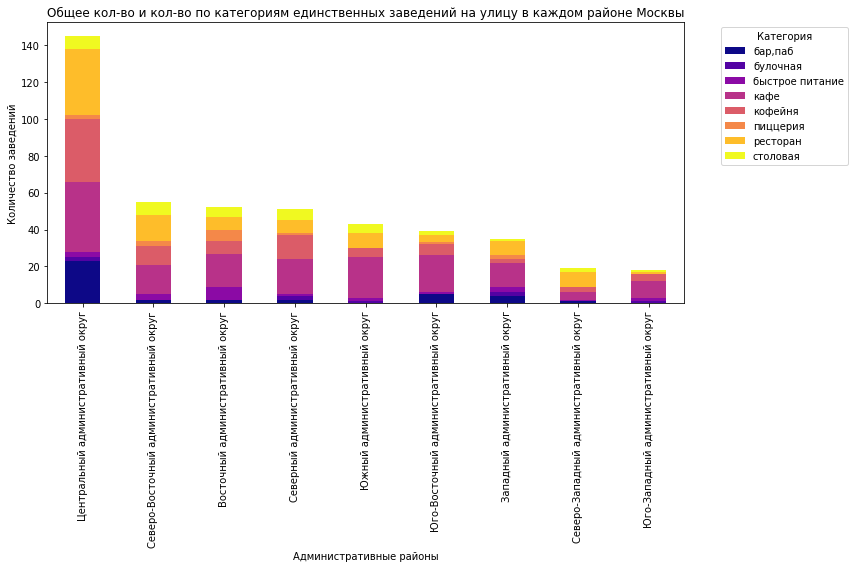

In [38]:
# группировка данных по районам и категориям
district_category_single_counts = single_establishment_info.groupby(['district', 'category']).size().reset_index(name='count')

# создание сводной таблицы для удобства построения графика
pivot_single_district_category = district_category_single_counts.pivot(index='district', columns='category', values='count').fillna(0)

# сортировка по общему количеству заведений
pivot_single_district_category = pivot_single_district_category.loc[
    pivot_single_district_category.sum(axis=1).sort_values(ascending=False).index
]

# построение графика
plt.figure(figsize=(12, 8))
pivot_single_district_category.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='plasma')
plt.title('Общее кол-во и кол-во по категориям единственных заведений на улицу в каждом районе Москвы')
plt.xlabel('Административные районы')
plt.ylabel('Количество заведений')
plt.legend(title='Категория', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Чаще всего одно заведение на улицу встречается в Центральном районе Москвы. Это может быть обусловлено большим количество маленьких улочек.

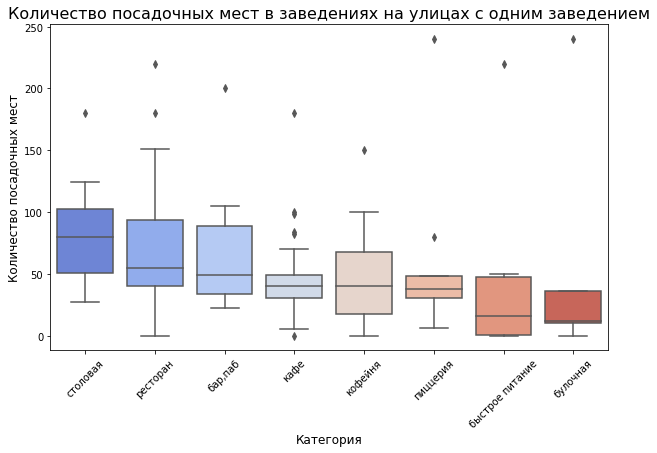

In [39]:
# вычисление медианы количества посадочных мест для каждой категории
median_seats_by_category = single_establishment_info.groupby('category')['seats'].median().sort_values(ascending=False)

# построение boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='seats', data=single_establishment_info, palette='coolwarm', order=median_seats_by_category.index)
plt.title('Количество посадочных мест в заведениях на улицах с одним заведением', fontsize=16)
plt.ylabel('Количество посадочных мест', fontsize=12)
plt.xlabel('Категория', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Столовые имеют наибольшее медианное количество посадочных мест (около 90), но также показывают значительное разнообразие в количестве мест, включая несколько выбросов с количеством мест более 150.
Рестораны и бары/пабы также имеют относительно высокое медианное количество посадочных мест (более 50), причём рестораны демонстрируют чуть больше вариативности и наличие выбросов.
Кофейни, кафе, и пиццерии имеют меньшее медианное количество посадочных мест по сравнению с другими категориями, что указывает на меньшие размеры этих заведений.
Заведения быстрокго питания и булочные имеют наименьшее количество посадочных мест, что может быть связано с их спецификой — обычно эти заведения не ориентированы на большое количество посетителей на месте.

Из этого можно сделать вывод что более крупные заведения, такие как рестораны и столовые, имеют больше посадочных мест даже на улицах, где представлено только одно заведение. Меньшие заведения, такие как кафе, кофейни и булочные, чаще имеют ограниченное количество мест.

### Данные о среднем чеке

Посмотрим как распределяется значение среднего чека в зависимости от района города.

In [40]:
# подсчет и вывод медианного среднего чека по районам Москвы
middle_avg_bill_df = data.groupby('district', as_index=False)['middle_avg_bill'].agg('mean').sort_values(by=['middle_avg_bill'], ascending=False)
middle_avg_bill_df

,district,middle_avg_bill
5,Центральный административный округ,1191.06
1,Западный административный округ,1053.23
2,Северный административный округ,927.96
8,Южный административный округ,834.40
4,Северо-Западный административный округ,822.22
0,Восточный административный округ,820.63
7,Юго-Западный административный округ,792.56
3,Северо-Восточный административный округ,716.61
6,Юго-Восточный административный округ,654.10


In [41]:
# построение тепловой карты по среднему чеку
m = folium.Map([55.751244, 37.618423], zoom_start=10)
heatmap_data = data[['lat','lng', 'middle_avg_bill']].copy().dropna() # без удаления пустых значений heatmap не сработает
heatmap = heatmap_data[['lat','lng', 'middle_avg_bill']] 
HeatMap(data=heatmap, radius=14).add_to(m)
m 

Средний чек в заведениях общественного питания варьируется в зависимости от района, и как правило, выше в центральных и престижных районах города.
Центральные районы Москвы выделяются самыми высокими медианными чеками, что можно связать с более высокой арендной платой, уровнем доходов жителей и туристической привлекательностью. Эти районы отображены наиболее насыщенными красными цветами.
Западные и южные районы также имеют относительно высокие средние чеки, что можно объяснить наличием престижных жилых комплексов и более дорогих заведений общественного питания.
Северные и восточные районы имеют более низкие медианные чеки, отображаемые желтым, зелены и синим цветами. Это может указывать на то, что в этих районах преобладают заведения с более доступными ценами.

## Исследование данных о кофейнях

### Доля кофеен среди заведений общественного питания

Посмотрим как распределяются доли и количество кофеен по категориям заведений в зависимости от района Москвы.

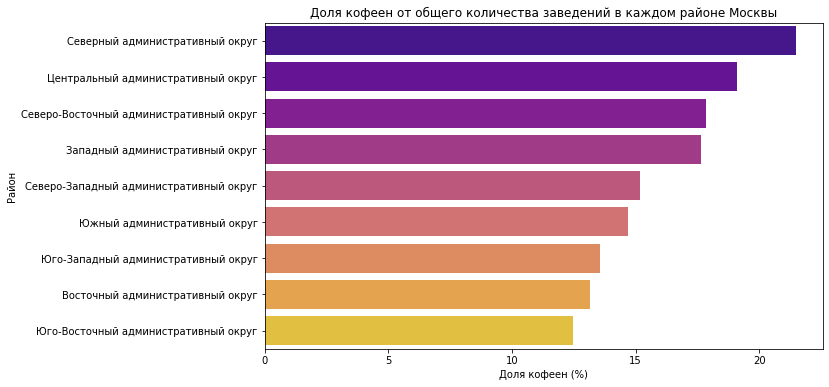

In [42]:
# подсчет общего количества заведений по районам
total_counts = data['district'].value_counts()

# фильтрация кофеен
coffee_data = data[data['category'] == 'кофейня']

# подсчет кофеен по районам
coffee_counts = coffee_data['district'].value_counts()

# вычисление доли кофеен
coffee_share = (coffee_counts / total_counts) * 100

# сортировка по доле заведений
coffee_share = coffee_share.sort_values(ascending=False)

# построение графика
plt.figure(figsize=(10, 6))
sns.barplot(x=coffee_share.values, y=coffee_share.index, palette="plasma")
plt.title('Доля кофеен от общего количества заведений в каждом районе Москвы')
plt.xlabel('Доля кофеен (%)')
plt.ylabel('Район')
plt.show()

Наибольшая доля кофеен по сравнению с общим количеством заведений наблюдается в Центральном административном округе и Северо-Западном административном округе.
Южный административный округ имеет наименьшую долю кофеен среди всех округов.

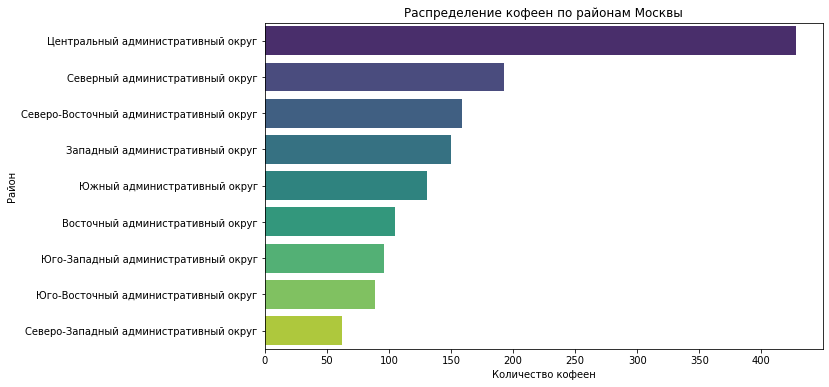

In [43]:
# подсчет кофеен по районам
district_counts = coffee_data['district'].value_counts()

# сортировка по количеству заведений
district_counts = district_counts.sort_values(ascending=False)

# построение графика
plt.figure(figsize=(10, 6))
sns.barplot(x=district_counts.values, y=district_counts.index, palette="viridis")
plt.title('Распределение кофеен по районам Москвы')
plt.xlabel('Количество кофеен')
plt.ylabel('Район')
plt.show()

Наибольшее количество кофеен сосредоточено в Центральном административном округе, что вполне ожидаемо, учитывая его центральное расположение и высокую плотность заведений.
В других округах количество кофеен значительно меньше, при этом в Южном и Юго-Западном округах наблюдается также относительно небольшое количество заведений.

### Круглосуточные и некруглосуточные кофейни

Проверим есть ли круглосуточные кофейни.

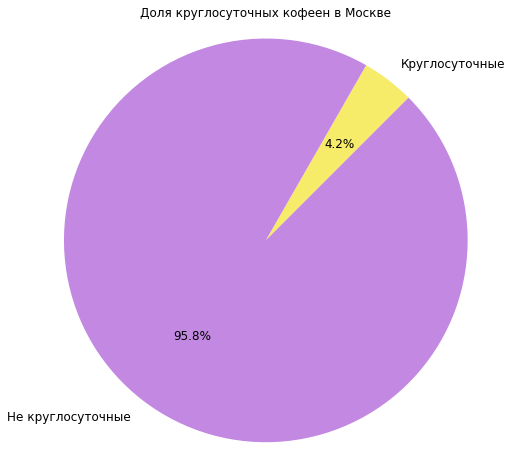

In [44]:
# подсчет количества круглосуточных и некруглосуточных кофеен на основе столбца is_24_7
round_the_clock_count = coffee_data[coffee_data['is_24_7'] == True].shape[0]
non_round_the_clock_count = coffee_data[coffee_data['is_24_7'] == False].shape[0]

# данные для диаграммы
labels = ['Круглосуточные', 'Не круглосуточные']
sizes = [round_the_clock_count, non_round_the_clock_count]
colors = ['#f7ec69', '#c288e2']

# построение круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=45,
        textprops={'fontsize': 12})
plt.title('Доля круглосуточных кофеен в Москве')
plt.axis('equal')
plt.show()

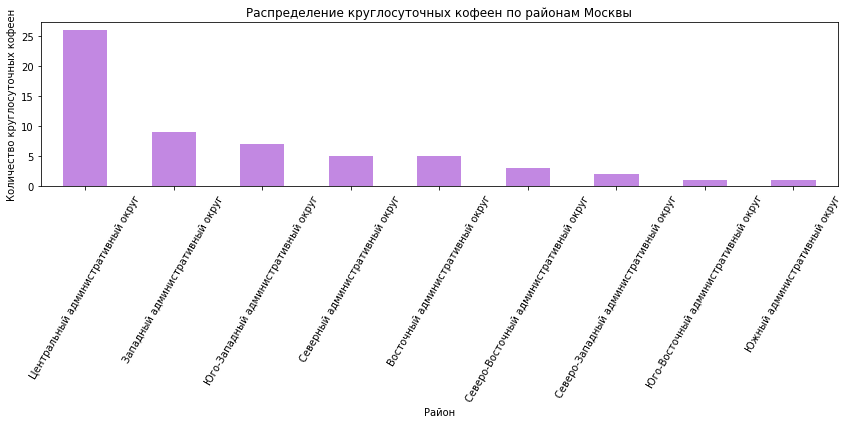

In [45]:
# фильтрация только круглосуточных кофеен
round_the_clock_coffee_data = coffee_data[coffee_data['is_24_7'] == True]

# подсчет количества круглосуточных кофеен по районам
district_coffee_count = round_the_clock_coffee_data['district'].value_counts().sort_values(ascending=False)


# построение графика
plt.figure(figsize=(12, 6))
district_coffee_count.plot(kind='bar', color='#c288e2')
plt.title('Распределение круглосуточных кофеен по районам Москвы')
plt.xlabel('Район')
plt.ylabel('Количество круглосуточных кофеен')
plt.xticks(rotation=60)
plt.tight_layout()

plt.show()


Доля круглосуточных кофеен совсем небольшая, однако такие заведения есть. Круглосуточные кофейни сконцентрированы в Центральном и Юго-Западном районах.

### Распределение рейтингов кофеен по районам Москвы

Посмотрим как распределяется рейтинг кофеент по районам Москвы.

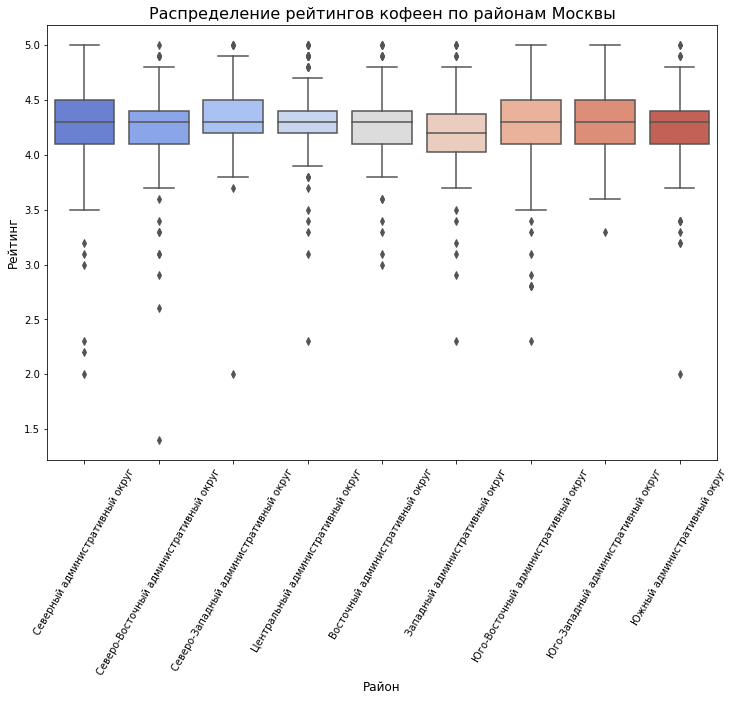

In [46]:
# фильтрация данных по категории 'кофейня'
coffee_data = data[data['category'] == 'кофейня']

# вычисление медиан рейтингов по категориям и сортировка по убыванию
sorted_coffee_data = coffee_data.groupby('district')['rating'].median().sort_values(ascending=False).index

# построение графика "ящик с усами" (Boxplot) распределения рейтингов кофеен по районам
plt.figure(figsize=(12, 8))
sns.boxplot(x='district', y='rating', data=coffee_data, palette='coolwarm')
plt.title('Распределение рейтингов кофеен по районам Москвы', fontsize=16)
plt.xticks(rotation=60)
plt.xlabel('Район', fontsize=12)
plt.ylabel('Рейтинг', fontsize=12)
plt.show()

Рейтинги кофеен по районам Москвы распределяются достаточно равномерно, большинство из них находятся в диапазоне 4.0–4.5.
Средний рейтинг кофеен в большинстве округов держится на уровне 4, при этом диапазон оценки достаточно широкий, что указывает на наличие как хорошо, так и слабо оцененных заведений.

### Цена чашки капучино в разбивке по районам Москвы

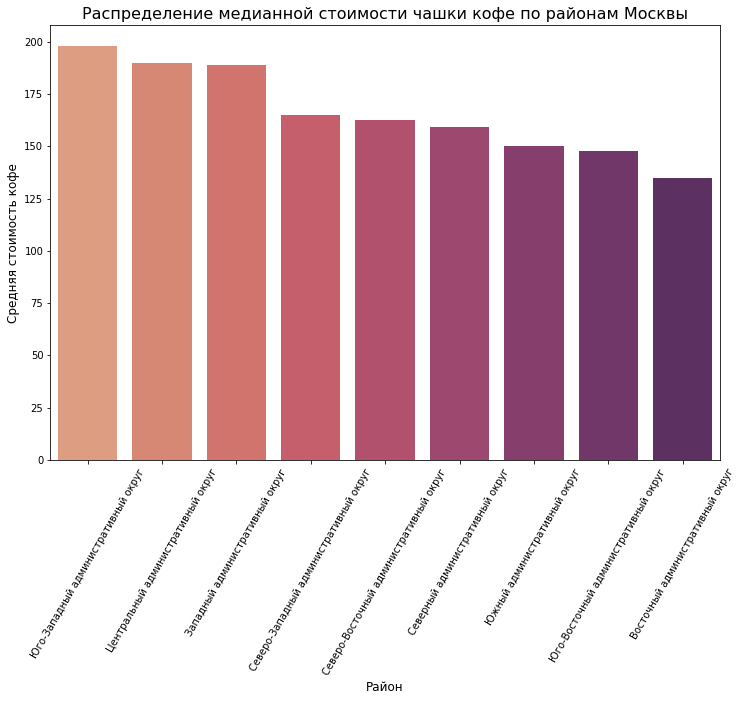

In [47]:
# группировка данных по районам и расчет средней стоимости кофе
coffee_price_by_district = coffee_data.groupby('district')['middle_coffee_cup'].median().sort_values(ascending=False).reset_index()

# построение столбчатого графика распределения средней стоимости кофе по районам
plt.figure(figsize=(12, 8))
sns.barplot(x='district', y='middle_coffee_cup', data=coffee_price_by_district, palette='flare')
plt.title('Распределение медианной стоимости чашки кофе по районам Москвы', fontsize=16)
plt.xticks(rotation=60)
plt.xlabel('Район', fontsize=12)
plt.ylabel('Средняя стоимость кофе', fontsize=12)
plt.show()

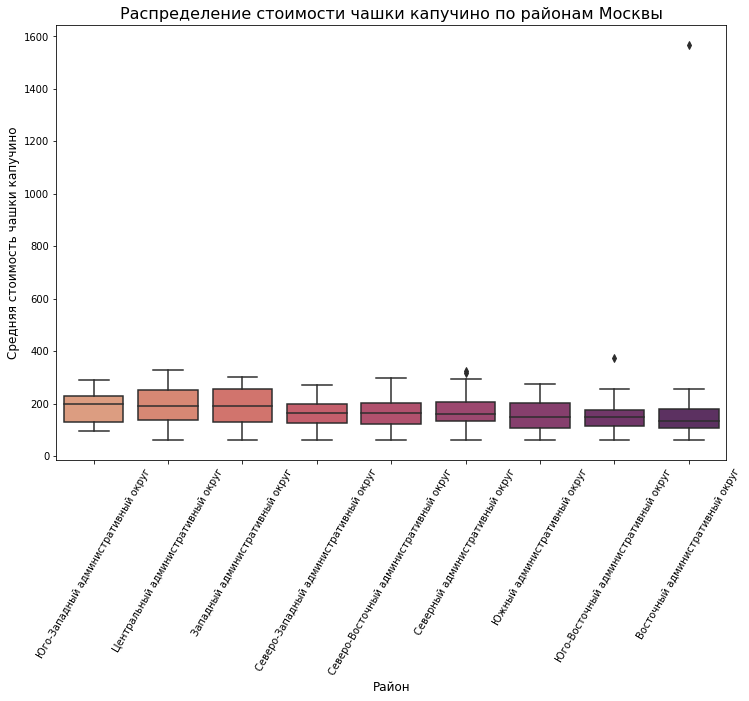

In [48]:
# фильтрация по средней стоимости кофе меньше 500
coffee_data_price = coffee_data[coffee_data['middle_coffee_cup'] < 500]

# вычисление медианы стоимости для каждого района и сортировка по убыванию
median_price_by_district = coffee_data_price.groupby('district')['middle_coffee_cup'].median().sort_values(ascending=False)

# построение boxplot с сортировкой районов по медиане
plt.figure(figsize=(12, 8))
sns.boxplot(x='district', y='middle_coffee_cup', data=coffee_data, palette='flare', order=median_price_by_district.index)
plt.title('Распределение стоимости чашки капучино по районам Москвы', fontsize=16)
plt.xticks(rotation=60)
plt.xlabel('Район', fontsize=12)
plt.ylabel('Средняя стоимость чашки капучино', fontsize=12)
plt.show()

Наибольшая средняя стоимость чашки капучино наблюдается в Центральном административном округе, что неудивительно из-за более высоких цен в центре города.
В других округах цены на чашку кофе в среднем ниже, при этом диапазон цен в некоторых округах, например, в Южном административном округе, более узкий.
Однако есть районы с необычно высокими ценами (выбросы), например, в Восточном и Северо-Западном округах.

### Количество посадочных мест в разбивке по районам Москвы

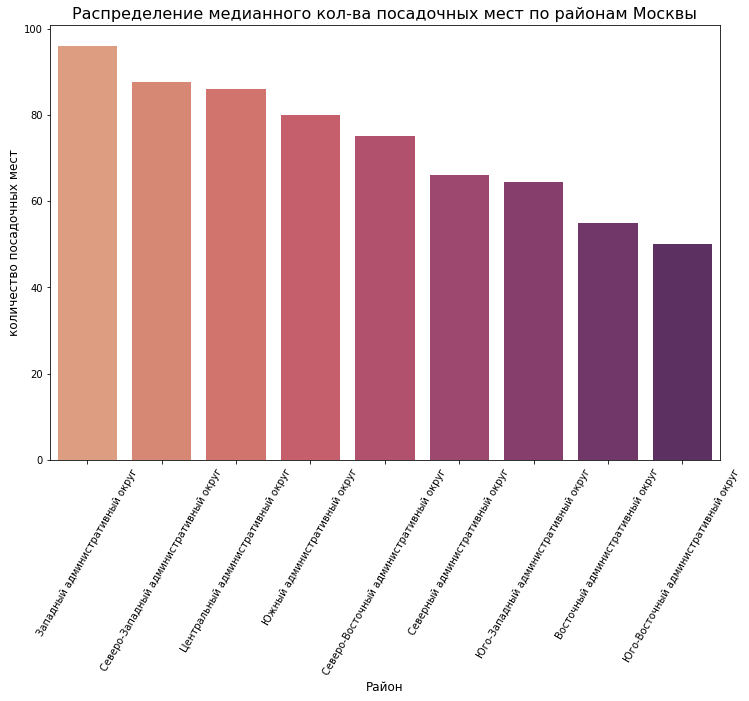

In [49]:
# группировка данных по районам и расчет средней стоимости кофе
coffee_seats_by_district = coffee_data.groupby('district')['seats'].median().sort_values(ascending=False).reset_index()

# построение столбчатого графика распределения средней стоимости кофе по районам
plt.figure(figsize=(12, 8))
sns.barplot(x='district', y='seats', data=coffee_seats_by_district, palette='flare')
plt.title('Распределение медианного кол-ва посадочных мест по районам Москвы', fontsize=16)
plt.xticks(rotation=60)
plt.xlabel('Район', fontsize=12)
plt.ylabel('количество посадочных мест', fontsize=12)
plt.show()

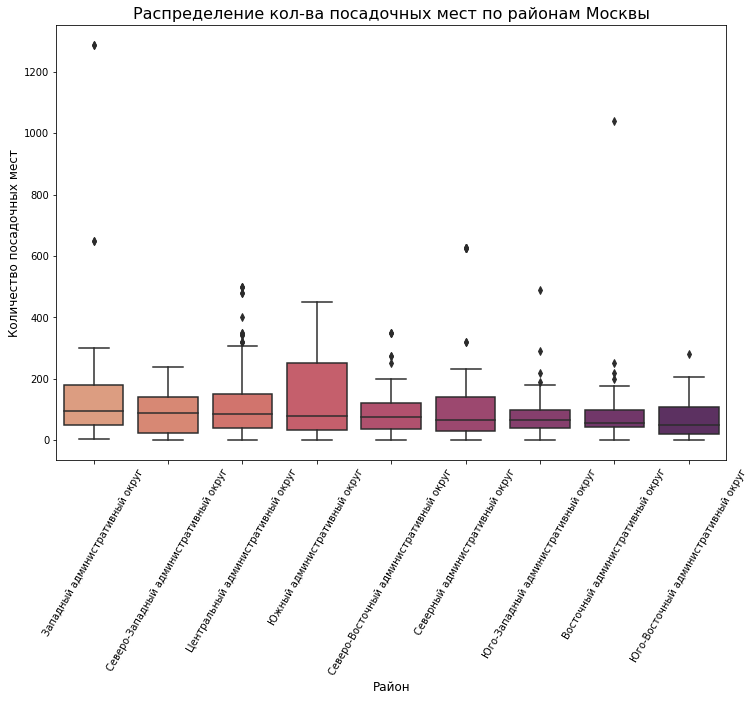

In [50]:
# вычисление медианы стоимости для каждого района и сортировка по убыванию
median_seats_by_district = coffee_data.groupby('district')['seats'].median().sort_values(ascending=False)

# построение графика "ящик с усами" (Boxplot) распределения рейтингов кофеен по районам
plt.figure(figsize=(12, 8))
sns.boxplot(x='district', y='seats', data=coffee_data, palette='flare', order=median_seats_by_district.index)
plt.title('Распределение кол-ва посадочных мест по районам Москвы', fontsize=16)
plt.xticks(rotation=60)
plt.xlabel('Район', fontsize=12)
plt.ylabel('Количество посадочных мест', fontsize=12)
plt.show()

Вместимость кофеен варьируется в зависимости от округа Москвы. В центральных и некоторых западных районах расположены более вместительные кофейни, что связано с высокой посещаемостью этих районов. В периферийных округах преобладают кофейни с меньшим числом мест.
Разброс данных указывает на существование заведений с существенно различающимся количеством посадочных мест даже в пределах одного округа. Например, в Северном, Западном и Восточном округе разброс особенно велик, что говорит о большом разнообразии заведений (от небольших кофеен до крупных кафе)
В некоторых округах наблюдаются заведения с крайне большим количеством мест (например, в ЦАО), что может быть связано с наличием крупных кофеен, предлагающих больше пространства для посетителей.

## Выводы

<b>Исследовательский анализ данных</b>

В столбцах, связанных с ценами и количеством мест, присутствуют значительные пропуски, что снижает точность анализа. Заполнение таких пропусков или их удаление невозможно из-за большого количества отсутствующих данных.

На основе проведенного исследования можно сделать несколько ключевых выводов, которые могут помочь инвесторам при принятии решений относительно открытия нового заведения в Москве.

<b>Данных о ценах и количестве мест в заведениях ограничены, но их достаточно для общего анализа.</b> Несмотря на наличие пропусков в данных, общие тенденции в категориях заведений, их расположении и популярности дают ясную картину рыночной ситуации.

<b>Популярность категорий заведений:</b> Наиболее распространены кафе, рестораны и кофейни, что говорит о высокой популярности заведений для быстрого питания и отдыха. Бары и пабы также востребованы для вечернего времяпрепровождения.

<b>Количество мест в заведениях:</b> Рестораны и бары имеют больше посадочных мест, чем кафе и кофейни, что связано с разницей во времени пребывания посетителей и концепцией заведений.

<b>Сетевые и несетевые заведения:</b> Несетевых заведений больше, но сетевые кофейни, пиццерии и булочные доминируют в своих категориях благодаря стандартизации и ориентации на массовый сегмент.

<b>Популярные сети:</b> Топ-15 включает сети кофеен и пиццерий, что подтверждает популярность формата быстрого питания.

<b>Заведения по районам:</b> Центральный район лидирует по количеству заведений и их разнообразию. В остальных районах распределение более равномерное.

<b>Рейтинги:</b> В большинстве категорий заведений оценки стабильны, с медианными значениями около 4,3, что указывает на высокий уровень удовлетворенности клиентов.

<b>Концентрация заведений на улицах:</b> Проспект Мира и другие крупные улицы лидируют по количеству заведений, что свидетельствует о высокой проходимости и популярности этих мест.

<b>Средний чек:</b> В центральных и престижных районах Москвы средний чек значительно выше, чем в северных и восточных районах, что связано с уровнем жизни и арендной платой.
    
<b>Вывод:</b>
Наиболее популярные форматы — кафе, рестораны и кофейни — составляют основную часть заведений, что говорит о высоком спросе на быстрые и доступные места для питания, а также на заведения для более длительных визитов.
Кофейни играют значимую роль, особенно в центре города, где отмечается высокий спрос на заведения, где можно быстро перекусить или взять еду и напитки на вынос. Количество кофеен за пределами центра значительно меньше, что указывает на возможность расширения сетей или уникальных концепций кофеен в других районах.
Рынок кофеен в Москве демонстрирует высокий потенциал, как в центральных районах города, где сосредоточена деловая и туристическая активность, так и в менее насыщенных кофейнями районах также можно найти интересные возможности для открытия новых заведений, особенно с учетом запросов на доступные цены и хорошее качество.

<b>Вывод по исследованию данных о кофейнях в Москве</b>

<b>Доля кофеен среди заведений общественного питания</b>
Наибольшая концентрация кофеен наблюдается в Центральном административном районе, что ожидаемо из-за его высокого уровня активности деловой и туристической. Северо-Западный район также имеет значительную долю кофеен, тогда как Южный административный район демонстрирует наименьшую долю кофеен, что может свидетельствовать о более низком спросе на кофейни в этом районе или о большем преобладании других типов заведений.

<b>Круглосуточные кофейни</b>
Доля круглосуточных кофеен совсем небольшая, однако такие заведения есть. Круглосуточные кофейни сконцентрированы в Центральном и Юго-Западном районах.

<b>Распределение рейтингов кофеен</b>
Кофейни в разных районах Москвы имеют схожие рейтинги, в диапазоне от 4.0 до 4.5, что указывает на стабильное качество обслуживания и продукта. Однако, наличие широкого диапазона оценок говорит о разнообразии стандартов обслуживания среди разных заведений. Это может свидетельствовать о потенциале для повышения качества в определённых районах.

<b>Цена чашки капучино</b>
Цены на капучино ожидаемо самые высокие в Центральном округе, что связано с общими более высокими затратами на аренду и уровень цен в центре города. В остальных районах цены варьируются, и, хотя они в среднем ниже, наблюдаются значительные выбросы, особенно в Восточном и Северо-Западном округах. Это может быть связано с наличием как премиальных заведений, так и более доступных кофеен в этих округах.

<b>Вывод:</b>
Центральный административный округ является лидером по количеству и качеству кофеен, особенно в сегменте круглосуточных заведений, где активная городская жизнь требует удобного доступа к кофе. Однако, и в других округах есть возможности для роста рынка кофеен, особенно с учётом относительно стабильных рейтингов и умеренных цен. Южный административный округ может быть перспективным для открытия новых кофеен, так как в этом районе пока наблюдается наименьшая насыщенность рынка.


<b>Общий вывод:</b>
Исходя из анализа, можно сделать вывод, что успешное открытие и развитие заведения в Москве требует тщательного выбора района, анализа конкуренции и особенностей целевой аудитории, особенно в случае с кофейнями, которые остаются востребованными, но требуют уникальных предложений для привлечения клиентов.

## Рекомендации

<b>При открытии кофейни в Москве важно учесть следующие факторы:</b>

<b>Выбор района:</b>
Центральный район наиболее насыщен заведениями, включая кофейни, и цены на чашку кофе здесь самые высокие. Средняя стоимость чашки кофе в ЦАО выше по сравнению с другими округами. Если инвестор рассматривает открытие кофейни в центре, необходимо учесть высокую арендную плату и высокий уровень конкуренции. Однако спрос здесь стабильно высокий, особенно среди туристов, офисных работников и жителей с высоким доходом. 
В спальных районах и удалённых районах меньше конкуренции. Эти районы менее насыщены кофейнями, что открывает возможности для новых заведений. Здесь наблюдается относительно низкая конкуренция, а средняя стоимость чашки кофе немного ниже. Это делает данные районы привлекательными для среднеценовых и бюджетных кофейных концепций, ориентированных на жителей с доходом среднего класса и студентов. Открытие сети кофеен здесь может быть перспективным, особенно если предложить гибридный формат, совмещающий кофейню и место для встреч или учебы.

<b>Формат кофейни:</b>
В центре актуальны круглосуточные кофейни из-за активной ночной жизни и большого количества офисов. Если кофейня планируется в центре города, стоит рассмотреть круглосуточный режим работы, особенно если рядом расположены офисные здания, коворкинги или туристические зоны.
В спальных и удаленных от центра районах лучше открывать заведения с небольшим количеством мест, ориентированные на обслуживание "на вынос" и недолгое времяпрепровождение клиентов. Этот формат уже популярен в Москве и может быть прибыльным за счет высокой оборачиваемости клиентов и оптимизации расходов на аренду.Также имеет смысл рассмотреть формат кофейни с коворкинг-зоной, учитывая растущую популярность удаленной работы и фриланса.

<b>Ценовая политика:</b>
При выборе инвесторами центральных районов имеет смысл устанавливать более высокие цены на кофе, чем в спальных и удаленных районах. При формировании цен в спальных и удаленных районах стоит ориентироваться на среднеценовой сегмент или экономформат.

<b>Заключение:</b>
Для успешного открытия кофейни в Москве инвесторам следует учитывать специфику района, формат заведения и ценовую политику. В центре города целесообразно рассматривать премиальные кофейни или места с уникальными концепциями, тогда как в удаленных и спальных районах можно сфокусироваться на доступных форматах и ориентироваться на повседневный спрос.